<a href="https://colab.research.google.com/github/defne04/DSA210-PROJECT/blob/main/data_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65065 entries, 0 to 65064
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tournament  65065 non-null  object 
 1   Date        65065 non-null  object 
 2   Series      65065 non-null  object 
 3   Court       65065 non-null  object 
 4   Surface     65065 non-null  object 
 5   Round       65065 non-null  object 
 6   Best of     65065 non-null  int64  
 7   Player_1    65065 non-null  object 
 8   Player_2    65065 non-null  object 
 9   Winner      65065 non-null  object 
 10  Rank_1      65065 non-null  int64  
 11  Rank_2      65065 non-null  int64  
 12  Pts_1       65065 non-null  int64  
 13  Pts_2       65065 non-null  int64  
 14  Odd_1       65065 non-null  float64
 15  Odd_2       65065 non-null  float64
 16  Score       65065 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.4+ MB
None

Preview of the Dataset:
     

<ipython-input-15-988a0d082c48>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Match Intensity Index'] = data['Rank_1'] + data['Rank_2']
<ipython-input-15-988a0d082c48>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Serving Consistency'] = data['Pts_1'] - data['Pts_2']
<ipython-input-15-988a0d082c48>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

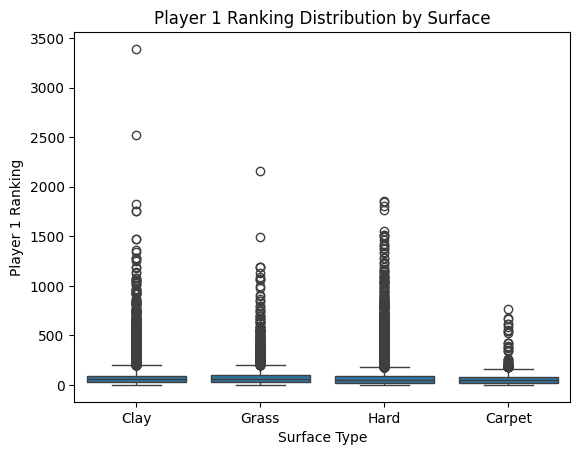

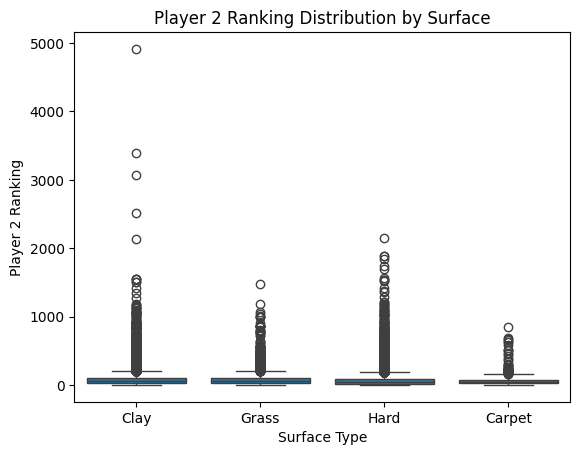

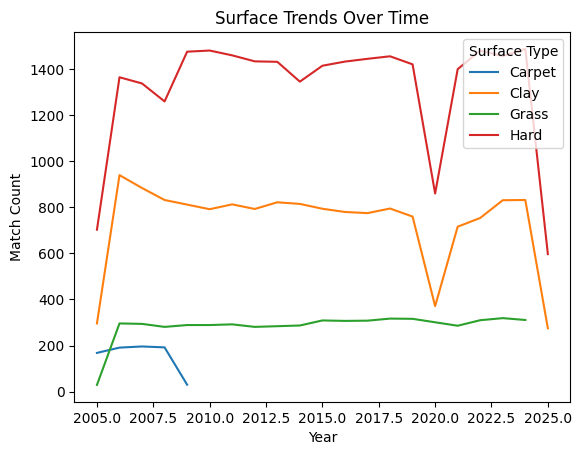

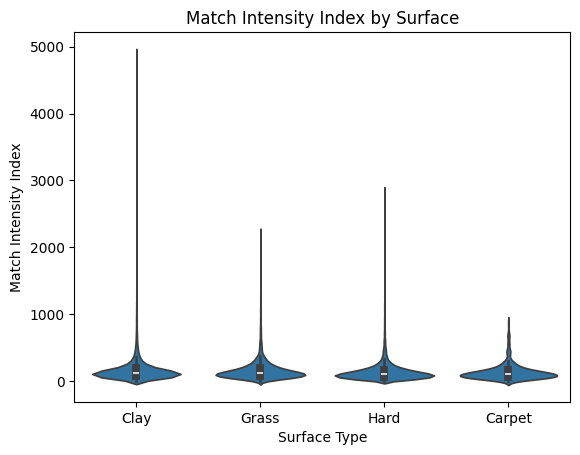


ANOVA Test Results:
F-statistic: 57.51834379940432, p-value: 1.1209817823730134e-25


<ipython-input-15-988a0d082c48>:88: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Surface', y='Win Margin', data=data, ci=None)


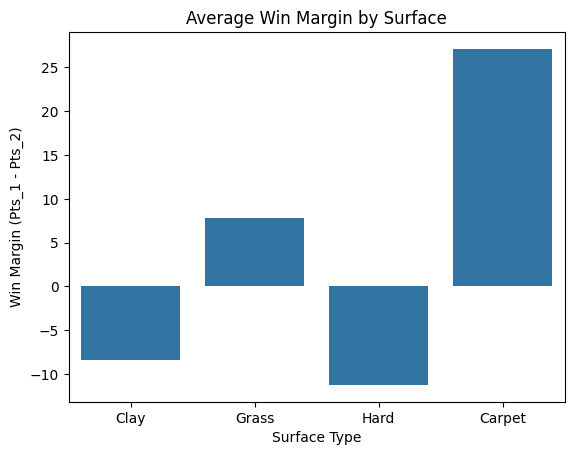

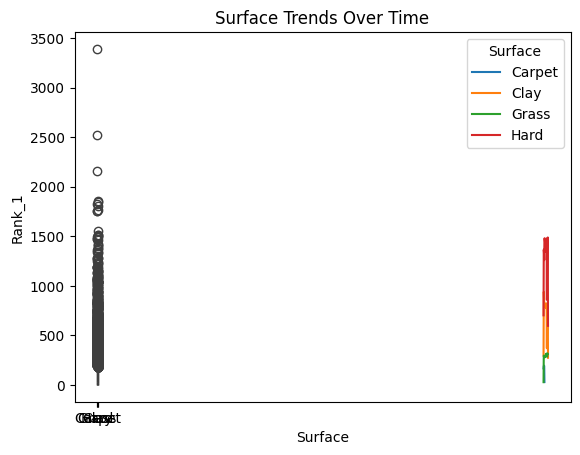

In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Upload the dataset to Colab
from google.colab import files

# This will prompt you to upload the dataset manually
uploaded = files.upload()

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('atp_tennis.csv')
print("Dataset Info:")
print(data.info())
print("\nPreview of the Dataset:")
print(data.head())

# Handle missing and invalid data
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())

# Remove invalid rows (where Pts_1 or Pts_2 is -1)
data = data[(data['Pts_1'] != -1) & (data['Pts_2'] != -1)]

print("\nMissing Values After Cleaning:")
print(data.isnull().sum())

# Create new features
data['Match Intensity Index'] = data['Rank_1'] + data['Rank_2']
data['Serving Consistency'] = data['Pts_1'] - data['Pts_2']
data['Win Margin'] = data['Pts_1'] - data['Pts_2']

# Display newly created features
print("\nNewly Created Features (Preview):")
print(data[['Match Intensity Index', 'Serving Consistency', 'Win Margin']].head())

# Boxplot for Player 1 rankings by surface
sns.boxplot(x='Surface', y='Rank_1', data=data)
plt.title('Player 1 Ranking Distribution by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Player 1 Ranking')
plt.show()

# Boxplot for Player 2 rankings by surface
sns.boxplot(x='Surface', y='Rank_2', data=data)
plt.title('Player 2 Ranking Distribution by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Player 2 Ranking')
plt.show()

# Extract the year from the date
data['Year'] = pd.to_datetime(data['Date']).dt.year

# Group data by year and surface type
surface_trends = data.groupby(['Year', 'Surface']).size().reset_index(name='Match Count')

# Plot trends
sns.lineplot(x='Year', y='Match Count', hue='Surface', data=surface_trends)
plt.title('Surface Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Match Count')
plt.legend(title='Surface Type')
plt.show()

# Violin plot for Match Intensity Index across surfaces
sns.violinplot(x='Surface', y='Match Intensity Index', data=data)
plt.title('Match Intensity Index by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Match Intensity Index')
plt.show()

# Perform ANOVA test for Player 1 rankings across surfaces
clay = data[data['Surface'] == 'Clay']['Rank_1']
grass = data[data['Surface'] == 'Grass']['Rank_1']
hard = data[data['Surface'] == 'Hard']['Rank_1']

f_stat, p_value = f_oneway(clay, grass, hard)
print("\nANOVA Test Results:")
print(f"F-statistic: {f_stat}, p-value: {p_value}")

# Interpretation:
# If p-value < 0.05, reject the null hypothesis.
# Surface type significantly affects Player 1's ranking.

# Average Win Margin by Surface
sns.barplot(x='Surface', y='Win Margin', data=data, ci=None)
plt.title('Average Win Margin by Surface')
plt.xlabel('Surface Type')
plt.ylabel('Win Margin (Pts_1 - Pts_2)')
plt.show()

# Save plots for including in your report
sns.boxplot(x='Surface', y='Rank_1', data=data)
plt.title('Player 1 Ranking Distribution by Surface')
plt.savefig('player1_rank_surface.png')

sns.lineplot(x='Year', y='Match Count', hue='Surface', data=surface_trends)
plt.title('Surface Trends Over Time')
plt.savefig('surface_trends_over_time.png')


# Yeni Bölüm